In [203]:
import numpy as np 
import networkx as nx 
import torch
import matplotlib.pyplot as plt
from bisect import bisect_left
import random

## Create Dataset

### Extract data from the txt files

In [204]:
path = "Cit-HepPh.txt"
path2 = "cit-HepPh-dates.txt"
data = []
with open(path, "r") as file:
    for line in file:
        values = line.strip().split()
        values[0]=int(values[0])
        values[1]=int(values[1])
        data.append(values)

data = sorted(data, key=lambda x: (x[0], x[1]))
print(len(data))
print(data[0:100])
# data is sorted

# ERROR->
check_array = np.zeros(len(data))
###########

date_published = {}
with open(path2, "r") as file:
    for line in file:
        values = line.strip().split()
        values[0]=int(values[0])
        date_published[values[0]]=values[1]

date_published = dict(sorted(date_published.items(), key=lambda item: (item[1][0:4], item[1][5:7], item[1][8:10])))
# date_published = dict(sorted(date_published.items(), key=lambda item: item[0]))
        
print(date_published)
print(len(date_published))
# date_published dictionary is sorted on the basis of the dates the papers are published


421578
[[1001, 9212308], [1001, 9305239], [1001, 9306240], [1001, 9312276], [1001, 9312333], [1001, 9401294], [1001, 9403226], [1001, 9409265], [1001, 9511336], [1001, 9601359], [1001, 9602280], [1001, 9610553], [1001, 9701390], [1001, 9702424], [1001, 9708239], [1001, 9709423], [1001, 9710255], [1001, 9802439], [1001, 9810389], [1001, 9810409], [1001, 9903515], [1001, 9903516], [1001, 9905323], [1001, 9907385], [1001, 9907523], [1001, 9908523], [1001, 9909506], [1001, 9910563], [1001, 9912251], [1002, 9303309], [1002, 9307201], [1002, 9401219], [1002, 9407389], [1002, 9409375], [1002, 9503443], [1002, 9504316], [1002, 9508343], [1002, 9606211], [1002, 9606386], [1002, 9609331], [1002, 9803277], [1002, 9807423], [1002, 9808299], [1002, 9808312], [1002, 9811308], [1002, 9812320], [1002, 9812472], [1002, 9902371], [1002, 9902443], [1002, 9903404], [1002, 9907422], [1002, 9909540], [1002, 9912236], [1002, 9912463], [1002, 9912516], [1003, 9311243], [1003, 9405410], [1003, 9503208], [1003,

### Creating graphs from extracted data
- We create an array of graphs in which the i<sup>th</sup> graph holds all the data about the citation network from 1992 till the year **1992 + i**
- This helps us analyze how the graph is changing over the years

In [205]:
# Create graph year by year
G = nx.DiGraph()

G_array = []
iterator = iter(date_published.items())

# def fn(arr):
#     for ele in arr:
#         print(ele.number_of_nodes(), end=" ")
#     print()
#     for ele in arr:
#         print(ele.number_of_edges(), end=" ")
#     print()

prev_year_and_month = "-1"
curr_year_and_month = "1992-02"
x_time = []

for node, date in iterator:
    # adds a graph instance to the graph array
    curr_year_and_month = date[0:7]
    if curr_year_and_month !=prev_year_and_month:
        if prev_year_and_month!="-1":
            x_time.append(curr_year_and_month)
            print(f"Current year and month = {curr_year_and_month}")
            print(f"previous year and month = {prev_year_and_month}")
            print(f"number of nodes in G = {G.number_of_nodes()}")
            print(f"Number of edges in G = {G.number_of_edges()}")
            G_array.append(G.copy())
            print(f"size of G_array = {len(G_array)}")
            print()
    prev_year_and_month = curr_year_and_month

    # creates the next graph instance
    G.add_node(node)
    ind = bisect_left(data, [node, float('-inf')])
    for i in range(ind, len(data)):
        if data[i][0] != node:
            break
        G.add_edges_from([data[i]])
        check_array[i]=1

x_time.append(curr_year_and_month)
print(f"Current year and month = {curr_year_and_month}")
print(f"previous year and month = {prev_year_and_month}")
print(f"number of nodes in G = {G.number_of_nodes()}")
print(f"Number of edges in G = {G.number_of_edges()}")
G_array.append(G.copy())
print(f"size of G_array = {len(G_array)}")
print()

Current year and month = 1992-03
previous year and month = 1992-02
number of nodes in G = 2
Number of edges in G = 0
size of G_array = 1

Current year and month = 1992-04
previous year and month = 1992-03
number of nodes in G = 31
Number of edges in G = 3
size of G_array = 2

Current year and month = 1992-05
previous year and month = 1992-04
number of nodes in G = 72
Number of edges in G = 4
size of G_array = 3

Current year and month = 1992-06
previous year and month = 1992-05
number of nodes in G = 125
Number of edges in G = 7
size of G_array = 4

Current year and month = 1992-07
previous year and month = 1992-06
number of nodes in G = 202
Number of edges in G = 12
size of G_array = 5

Current year and month = 1992-08
previous year and month = 1992-07
number of nodes in G = 292
Number of edges in G = 25
size of G_array = 6

Current year and month = 1992-09
previous year and month = 1992-08
number of nodes in G = 364
Number of edges in G = 32
size of G_array = 7

Current year and mont

In [218]:
count=0
cat1 = set()
cat2 = set()
for i , check_val in enumerate(check_array):
    if check_val == 0:
        cat1.add(data[i][0])
        cat2.add(data[i][1])
        count+=1
print(f"count = {count}")
print(cat1)
print(cat2)
print(len(cat1))
# THE NODES IN THE SET cat1 ARE NOT PRESENT IN THE DATES.TXT FILE
# THEY ARE ONLY PRESENT IN THE EDGES.TXT FILE


count = 74164
{301222, 301223, 301224, 301225, 211336, 301226, 301227, 301228, 301229, 301230, 211337, 212314, 301231, 301233, 301234, 301235, 211338, 212315, 301236, 301237, 301238, 301239, 301240, 211339, 212316, 301241, 302122, 301242, 301243, 301244, 301245, 212317, 301246, 301247, 301248, 301249, 301250, 211341, 212318, 301252, 301253, 301254, 301255, 211342, 212319, 301256, 301257, 301258, 301260, 211343, 301261, 205001, 205003, 205004, 205005, 212320, 205007, 205008, 205009, 205010, 205011, 205012, 205013, 205014, 205015, 205016, 205017, 301263, 205019, 205020, 205021, 205022, 205023, 205024, 205025, 205026, 205027, 205028, 205029, 205030, 205031, 205032, 205033, 205034, 205035, 205036, 205037, 205038, 205039, 205040, 205041, 205042, 205043, 205044, 205045, 205046, 205047, 205048, 205049, 205050, 205051, 205052, 205053, 205054, 205055, 205056, 205057, 205058, 205059, 205060, 205061, 205062, 205063, 205064, 205065, 205066, 205067, 205068, 205069, 205070, 205071, 205072, 205073, 2

### Plotting the number of papers and citations against time

122
122


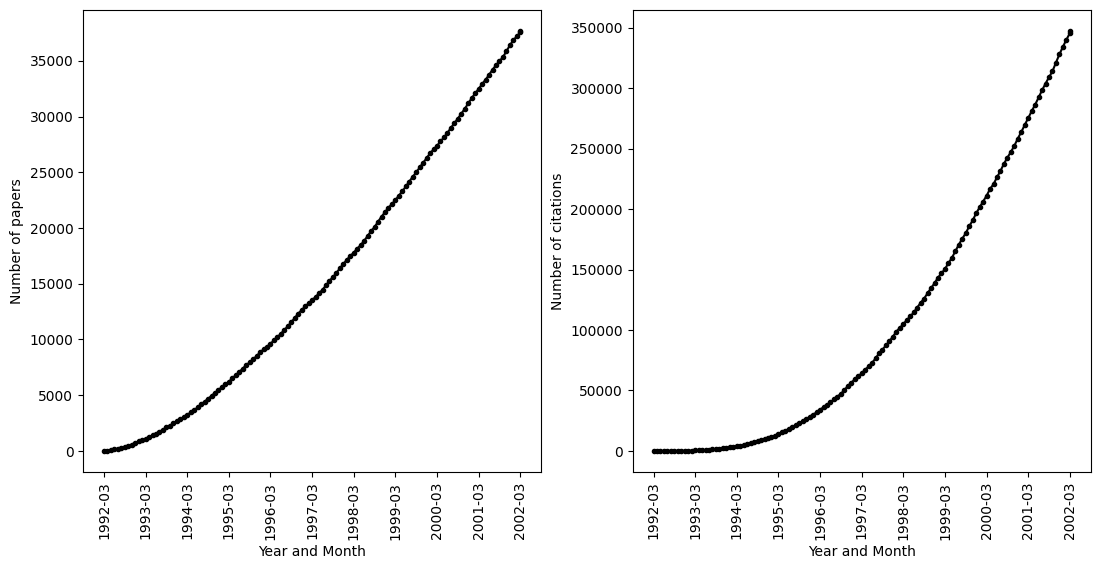

In [217]:
y_nodes = []
y_edges = []

for i, G in  enumerate(G_array):
    # print(f"num nodes = {G.number_of_nodes()}")
    y_nodes.append(G.number_of_nodes())
    y_edges.append(G.number_of_edges())

print(len(x_time))
print(len(y_nodes))

every_12th_time = x_time[::12] # used to get a clear labelling for the x-axis, otherwise the dates overlap
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.plot(x_time, y_nodes, linestyle="-", marker=".", label="number of papers", color="black")
plt.xticks(every_12th_time, every_12th_time, rotation=90)
plt.xlabel("Year and Month")
plt.ylabel("Number of papers")

plt.subplot(122)
plt.plot(x_time, y_edges, marker=".", label="number of citations", color="black")
plt.xticks(every_12th_time, every_12th_time, rotation=90)
plt.xlabel("Year and Month")
plt.ylabel("Number of citations")
plt.show()

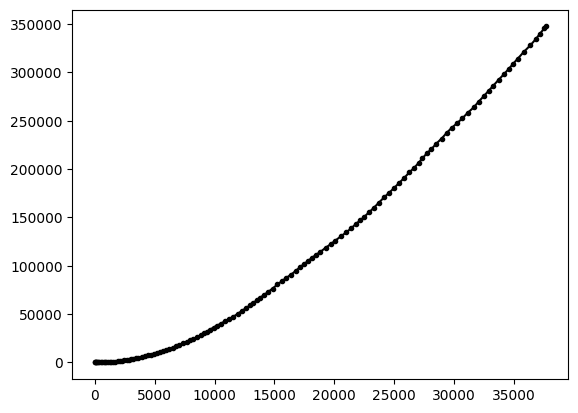

In [216]:
y_arr = []
for i, G in enumerate(G_array):
    y_arr.append(y_edges[i]/float(y_nodes[i]))

plt.plot(y_nodes, y_edges, marker=".", color="black")
plt.show()

### Plotting the Indegrees and the Outdegrees in the graphs
The plots show the pareto-like fat-tailed distribution. 
In every row, 
1. The first plot shows how a small number of papers are cited a very high number of times, while most of the papers barely get cited.
2. The second plot shows how a small number of papers cited a lot of other papers, while most of the papers did not site many papers.

Some examples of Pareto Distribution are displayed below:

<img src="./images/pareto_distribution.png" alt="Graph Showing Pareto Distribution" width="300px" height="300px">
<img src="./images/pareto_distribution2.png" alt="Graph Showing Pareto Distribution" width="300px" height="300px">

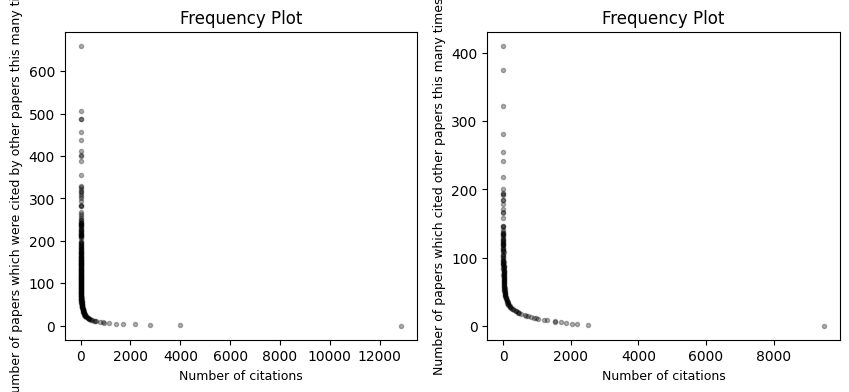

In [215]:
def plot_graph_degrees(G):
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())

    in_degrees = dict(sorted(in_degrees.items(), key=lambda item: -item[1]))
    out_degrees = dict(sorted(out_degrees.items(), key = lambda item: -item[1]))

    def plot_function(arr, xlabel, ylabel):
        d = {}
        for e in arr:
            if e not in d:
                d[e]=1
            else:
                d[e]+=1
        x = np.array(list(d.values()))
        y = np.array(list(d.keys()))

        plt.scatter(x=x,y=y, marker=".", alpha=0.3, color="black")
        xlab = plt.xlabel(xlabel=xlabel)
        xlab.set_fontsize(9)
        ylab = plt.ylabel(ylabel=ylabel)
        ylab.set_fontsize(9)
        plt.title("Frequency Plot")


    in_degrees_values = np.array(list(in_degrees.values()))
    out_degrees_values = np.array(list(out_degrees.values()))

    plt.figure(figsize=(10, 4)) 
    plt.subplot(1, 2, 1) 
    plot_function(in_degrees_values, xlabel="Number of citations", ylabel="Number of papers which were cited by other papers this many times")
    plt.subplot(1, 2, 2) 
    plot_function(out_degrees_values, xlabel="Number of citations", ylabel="Number of papers which cited other papers this many times")
    plt.show()


plot_graph_degrees(G)

## Task 2

### Community Detection Algorithms
- Need to implement 2 algorithms
- Can interpret strongly connected components